<a href="https://colab.research.google.com/github/EAFIT-BI/Business-Analytics---2025-I/blob/main/Aplicaci%C3%B3n_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Candy Bars

Nuestra base de datos consiste en la información nutricial de diferentes barras de chocolate. En la información tenemos:

1. Marca
2. Calorías por porción
3. Cantidad de proteinas
4. Cantidad de grasa
5. Cantidad de carbohidratos

El modelo debe determinar cuál es la mejor forma de agrupar las barras de chocolate en una máquina expendedora de dulces


In [17]:
# Importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos los datos
datos = pd.read_excel('/content/CandyBars.xlsx')
y = datos['Brands']
# Visualizamos la información
datos.head()

,Brands,Calories,Fat,Protein,Carb
0,Peanut Butter Twix,311.0,18.5,5.3,31.4
1,Baby Ruth,275.0,13.0,3.2,39.0
2,Caramel Twix,284.5,14.0,2.5,37.5
3,5th Avenue,279.5,12.5,4.5,41.0
4,Snickers,273.0,14.0,4.5,34.0


In [18]:
# Eliminamos la columna con las marcas, ya que de ella no depende la agrupación
datos.drop('Brands', axis = 1, inplace = True)

In [19]:
# Dado que la escala de los datos es muy diferente (300 vs 5), debemos escalar los
# datos. Para estos datos se pueden usar o el StandardScaler o el MinMax, ya
# que son normales pero debemos igualar la magnitud

# Importamos la librería
from sklearn.preprocessing import StandardScaler

# Instanciamos el escalador
escalador = StandardScaler()

# Escalamos los datos
datos_escalados = escalador.fit_transform(datos)

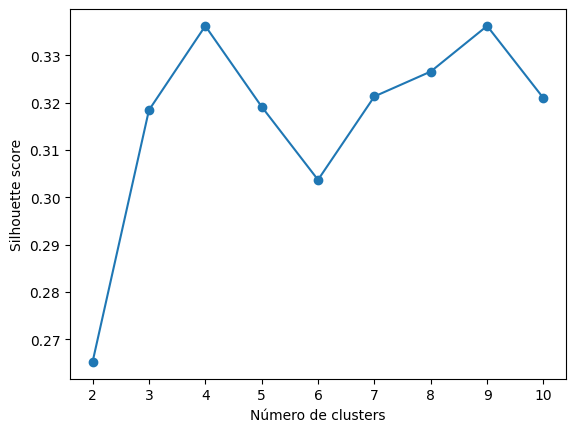

In [20]:
# Dado que no conocemos de antemano el número de grupos, usaremos
# silhouette para  encontrarlos
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

# Inicializamos la lista de los coeficientes
silhouette_scores = []
# Hacemos el ciclo recorriendo los diferentes números de grupos
for i in range(2, 11):
  modelo = AgglomerativeClustering(n_clusters = i, linkage = 'ward')
  modelo.fit(datos_escalados)
  silhouette_scores.append(silhouette_score(datos_escalados, modelo.labels_))
# Graficamos los diferentes coeficientes vs el número de clusters
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette score')
plt.show()

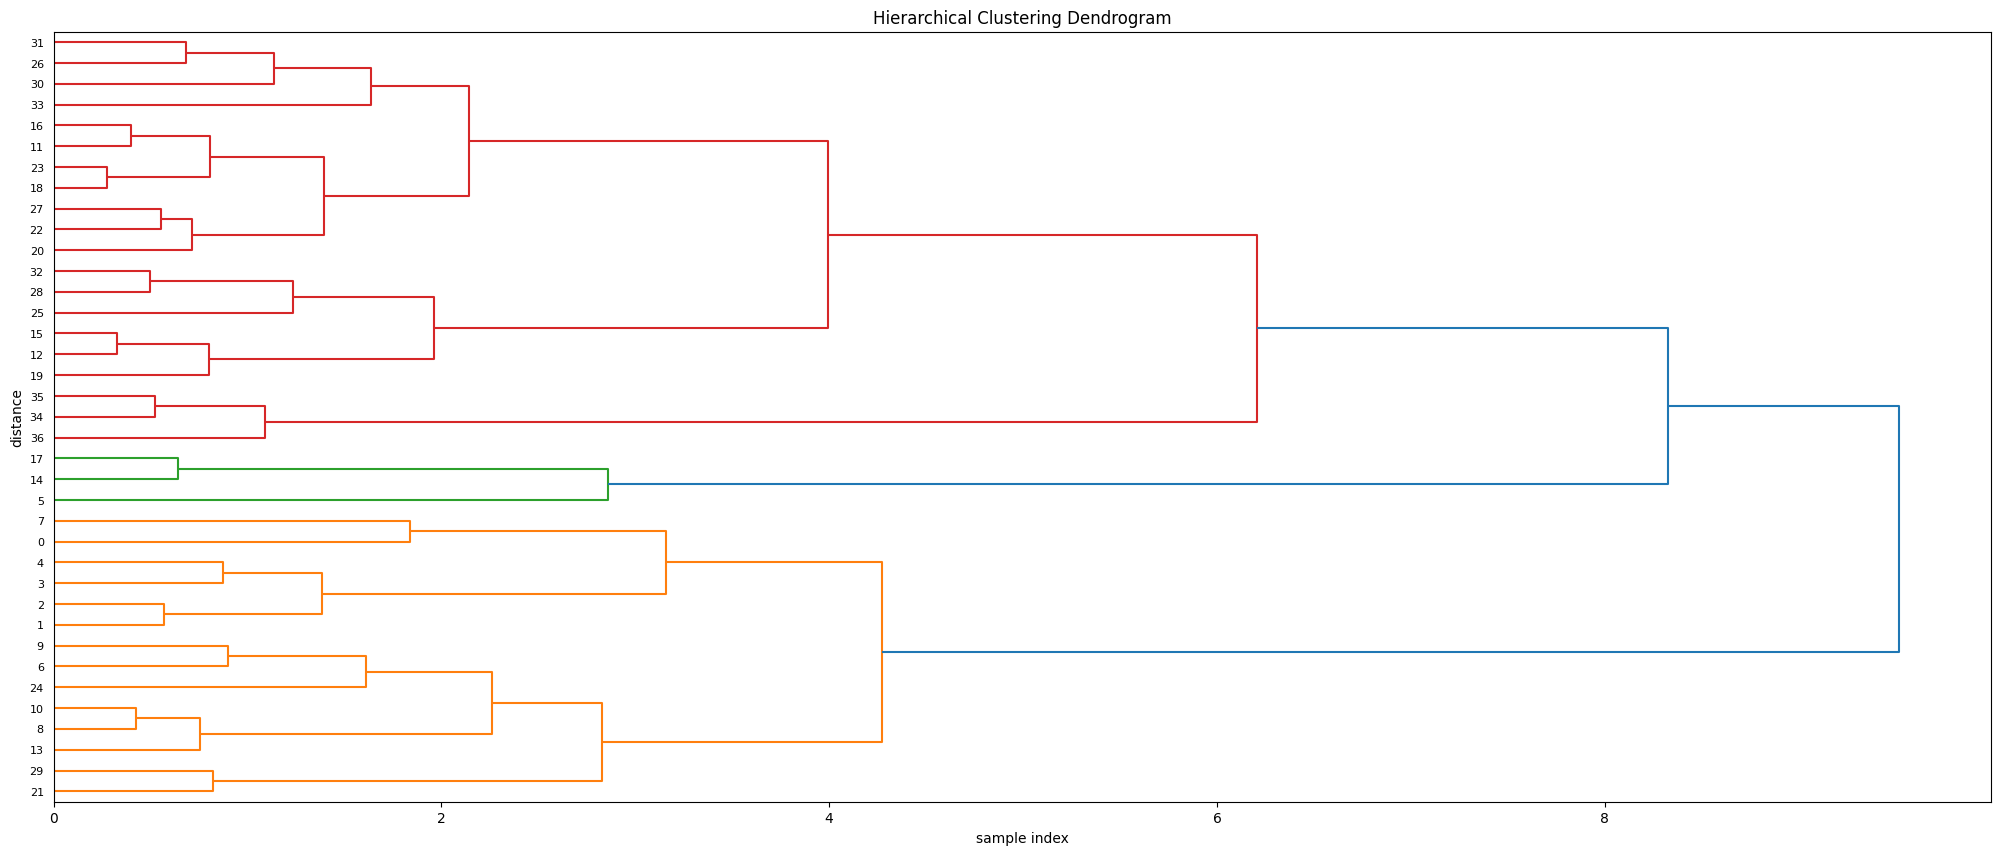

In [21]:
# El número adecuado de clusters es de 4 o 9, en este caso, elegiremos 4.
# Graficamos el dendograma para mirar la distribución
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(datos_escalados, method='ward')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z, leaf_rotation = 0, leaf_font_size = 8,
           orientation = 'right')
plt.show()

# Con el método ward, sólo nos muestra 3 clusters, vamos a observar con el
# silouette cómo se distribuirían los grupos.

In [23]:
# Cargamos librerías
from sklearn.metrics import silhouette_samples

modelo = AgglomerativeClustering(n_clusters = 4, linkage = 'ward')
modelo.fit(datos_escalados)

# Calculamos los scores
SilhouetteScores = silhouette_samples(datos_escalados, modelo.labels_)

# Organizamos los datos
SilhouetteData = pd.DataFrame({'Cluster': modelo.labels_,
                               'Coeficiente Silhouette': SilhouetteScores,
                               'Marca': y}).sort_values(['Cluster',
                                                         'Coeficiente Silhouette'])

# Visualizamos los resultados
SilhouetteData.head()

,Cluster,Coeficiente Silhouette,Marca
13,0,-0.097937,Mars Almond Bar
29,0,-0.019295,Goobers
24,0,0.050462,Butterfinger
21,0,0.067212,Reese's Peanut Butter Cups
2,0,0.078200,Caramel Twix


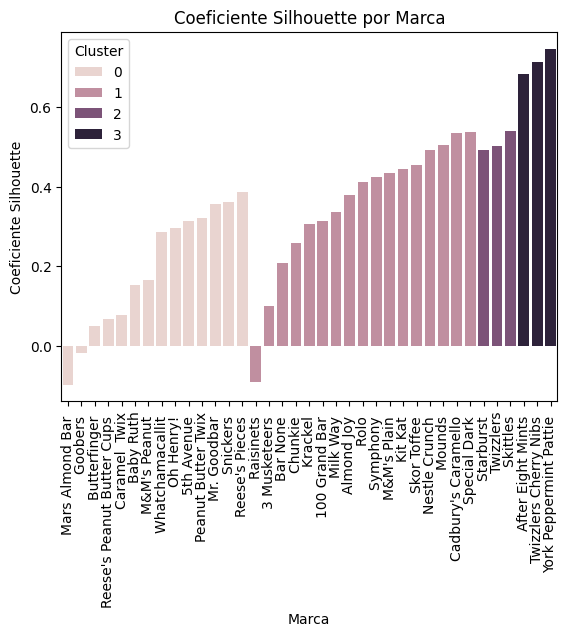

In [25]:
# Graficamos los resultados

sns.barplot(x = 'Marca', y = 'Coeficiente Silhouette',
            hue = 'Cluster', data = SilhouetteData,
            dodge = False)
plt.title('Coeficiente Silhouette por Marca')
plt.xlabel('Marca')
plt.ylabel('Coeficiente Silhouette')
plt.xticks(rotation = 'vertical')
plt.show()